# Projeto #1 - Análise Exploratória de Dados

Antes de começar, leia as [Instruções](https://github.com/thvmm/pos-ds-ia/tree/master/projeto_1#instru%C3%A7%C3%B5es) e os [Critérios de Avaliação](https://github.com/thvmm/pos-ds-ia/tree/master/projeto_1#crit%C3%A9rios-de-avalia%C3%A7%C3%A3o)


### 1) **(5%)** Qual a base escolhida e qual seu interesse nela?

*Indique o link da base no Kaggle e explique em um parágrafo curto por que essa base é interessante para você.*

https://www.kaggle.com/snocco/missing-migrants-project

Me interessei pela base, por possuir uma boa variedade de tipo de features, me permitindo aplicar os conhecimentos que estou adiquirindo no curso.

### 2) **(5%)** Descrição básica do conjunto de dados escolhido pelo aluno (1 parágrafo).
- Identificação da variável a serem trabalhadas
- Classificação das variáveis como: contínua ou discreta.


As variáveis que serão trabalhadas são: 'REGIAO_INCIDENTE', 'ANO_INCIDENTE', 'MES_INCIDENTE, 'TOTAL_MIGRANTES_MORTOS','TOTAL_MIGRANTES_DESAPARECIDOS','TOTAL_MIGRANTES_MORTOS_DESAPARECIDOS','QTDE_SOBREVIVENTES','QTDE_MULHERES','QTDE_HOMENS','QTDE_CRIANCAS'

Sua classificação é:

Contínuas: 'ANO_INCIDENTE', 'TOTAL_MIGRANTES_MORTOS','TOTAL_MIGRANTES_DESAPARECIDOS','TOTAL_MIGRANTES_MORTOS_DESAPARECIDOS','QTDE_SOBREVIVENTES','QTDE_MULHERES','QTDE_HOMENS','QTDE_CRIANCAS'

Discretas: 'REGIAO_INCIDENTE', MES_INCIDENTE'


### 2) **(15%)** Faça uma avaliação descritiva da sua base. Quantas linhas ela possui? Quais os tipos de dados? Quantas e quais features possuem?

Cada variável escolhida pelo aluno precisa passar por ao menos 1 pré-processamento. O pré-processamento pode ser (mas não está limitado a):
- Checagem se os valores estão dentro de um limite permitido ou razoável.
- Tratamento de valores ausentes por eliminação ou substituição.
- Conversão do tipo de dados.


In [ ]:
A base possui 5333 registros e 20 features.

Os registros são do tipo:
Inteiro: ID, ANO_INCIDENTE, TOTAL_MIGRANTES_MORTOS_DESAPARECIDOS, QUALIDADE_PESQUISA
Object: REGIAO_INCIDENTE, DATA_INCIDENTE, MES_INCIDENTE, CAUSA_MORTE, LOCAL_INCIDENTE, INFORMACOES_PESQUISA, COORDENADAS_LOCAL_INCIDENTE,  ROTA_MIGRACAO, URL, GEOGRAFICO
Float: TOTAL_MIGRANTES_MORTOS, TOTAL_MIGRANTES_DESAPARECIDOS, QTDE_SOBREVIVENTES, QTDE_MULHERES, QTDE_HOMENS, QTDE_CRIANCAS

a) Checagem se os valores estão dentro de um limite permitido ou razoável.
As variáveis 'TOTAL_MIGRANTES_MORTOS' e 'TOTAL_MIGRANTES_MORTOS_DESAPARECIDOS', possui o valor mínimo igual a zero, como o dataset é para analisar a quantidade ocorrida de mortos e/ou desaparecidos, zero não é um valor aceitavel. 
#dataset.drop(dataset[dataset.bedrooms==0].index ,inplace=True)
#migrantes.isnull().sum() #191 TOTAL_MIGRANTES_MORTOS vazio
migrantes = migrantes.dropna(subset=["TOTAL_MIGRANTES_MORTOS_DESAPARECIDOS"])
#titanic = titanic.update(titanic['Idade'].fillna('9'))
migrantes.describe()

Após o preenchimento, o percentual ficou 0%. 

????????????????????????verificar o valor máximo de cada variável
TOTAL_MIGRANTES_MORTOS	                MIN: 0 - MAX: 750.000000	
TOTAL_MIGRANTES_DESAPARECIDOS	        MIN: 0 - MAX: 750.000000
TOTAL_MIGRANTES_MORTOS_DESAPARECIDOS	MIN: 0 - MAX: 1022.000000	
QTDE_SOBREVIVENTES                      MIN: 0 - MAX: 1950.000000	
QTDE_HOMENS                             MIN: 0 - MAX: 30.000000	
QTDE_MULHERES                           MIN: 0 - MAX: 135.000000	
QTDE_CRIANCAS                           MIN: 0 - MAX: 250.000000



b) Tratamento de valores ausentes por eliminação ou substituição.

As colunas que não são de interesse, serão excluídas. São elas: ID, INFORMACOES_PESQUISA, COORDENADAS_LOCAL_INCIDENTE, URL, QUALIDADE_PESQUISA, DATA_INCIDENTE.

#migrantes.drop(['ID','INFORMACOES_PESQUISA','COORDENADAS_LOCAL_INCIDENTE','URL','QUALIDADE_PESQUISA','DATA_INCIDENTE'],axis = 1, inplace = True)
#migrantes.head()

c) Conversão do tipo de dados.
A feature MES_INCIDENTE será convertida para inteiro.



In [2]:
# Implemente sua análise aqui. Use mais blocos se achar que ficará mais organizado.
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
import numpy as np
from sklearn import preprocessing

migrantes = pd.read_csv("projeto_1/missing-migrants/MissingMigrants-Global.csv")
# Renomeando as features/colunas
migrantes.columns = ['ID', 'REGIAO_INCIDENTE','DATA_INCIDENTE','ANO_INCIDENTE','MES_INCIDENTE','TOTAL_MIGRANTES_MORTOS','TOTAL_MIGRANTES_DESAPARECIDOS','TOTAL_MIGRANTES_MORTOS_DESAPARECIDOS','QTDE_SOBREVIVENTES','QTDE_MULHERES','QTDE_HOMENS','QTDE_CRIANCAS','CAUSA_MORTE','LOCAL_INCIDENTE','INFORMACOES_PESQUISA','COORDENADAS_LOCAL_INCIDENTE','ROTA_MIGRACAO','URL','GEOGRAFICO','QUALIDADE_PESQUISA']
migrantes.head(5)

,ID,REGIAO_INCIDENTE,DATA_INCIDENTE,ANO_INCIDENTE,MES_INCIDENTE,TOTAL_MIGRANTES_MORTOS,TOTAL_MIGRANTES_DESAPARECIDOS,TOTAL_MIGRANTES_MORTOS_DESAPARECIDOS,QTDE_SOBREVIVENTES,QTDE_MULHERES,QTDE_HOMENS,QTDE_CRIANCAS,CAUSA_MORTE,LOCAL_INCIDENTE,INFORMACOES_PESQUISA,COORDENADAS_LOCAL_INCIDENTE,ROTA_MIGRACAO,URL,GEOGRAFICO,QUALIDADE_PESQUISA
0,51591,Mediterranean,"March 28, 2019",2019,Mar,NaN,2.0,2,36.0,NaN,2.0,NaN,Presumed drowning,"Off the coast of Chios, Greece",Hellenic Coast Guard via IOM Greece,"38.362368696592, 26.172509473654",Eastern Mediterranean,NaN,Uncategorized,5
1,51588,Mediterranean,"March 26, 2019",2019,Mar,4.0,NaN,4,11.0,3.0,NaN,1.0,Presumed drowning,"Off the coast of Ayvacık district, Çanakkale p...",Turkish Coast Guard via IOM Turkey,"39.441975591614, 26.378816195919",Eastern Mediterranean,http://bit.ly/2YmiPAN,Uncategorized,5
2,51589,Mediterranean,"March 26, 2019",2019,Mar,1.0,NaN,1,NaN,NaN,NaN,NaN,Presumed drowning,"Body recovered on Playa del Tarajal, Ceuta, Sp...","Ceuta al día, El Pueblo de Ceuta","35.871901875921, -5.343037665842",Western Mediterranean,"http://bit.ly/2uyj7qO, http://bit.ly/2uwj5zC",Uncategorized,3
3,51590,Mediterranean,"March 26, 2019",2019,Mar,1.0,NaN,1,NaN,NaN,NaN,NaN,Presumed drowning,"Body recovered on beach near Tetouan, Morocco ...",El Pueblo de Ceuta,"35.635115912988, -5.275650103548",Western Mediterranean,http://bit.ly/2uwj5zC,Uncategorized,1
4,51587,Central America,"March 25, 2019",2019,Mar,1.0,NaN,1,NaN,NaN,1.0,NaN,Fall from train,"Train tracks in Teacalco, Tlaxcala, Mexico","Megalópolis, Línea de contraste","19.334475177429, -98.069823987538",NaN,"http://bit.ly/2uvDIvH, http://bit.ly/2TXAFLS",Central America,3


In [ ]:
migrantes.dtypes  #análise dos dados

In [ ]:
migrantes.describe() #análise dos dados

In [2]:
# Percentual das features que não possuem valor (dados faltantes):
(migrantes.isnull().sum() / migrantes.shape[0]).sort_values(ascending=False)

TOTAL_MIGRANTES_DESAPARECIDOS           0.905682
QTDE_CRIANCAS                           0.879242
QTDE_SOBREVIVENTES                      0.859554
QTDE_MULHERES                           0.831802
ROTA_MIGRACAO                           0.501219
QTDE_HOMENS                             0.472530
URL                                     0.401463
TOTAL_MIGRANTES_MORTOS                  0.035815
GEOGRAFICO                              0.002063
LOCAL_INCIDENTE                         0.001875
INFORMACOES_PESQUISA                    0.000375
COORDENADAS_LOCAL_INCIDENTE             0.000188
ANO_INCIDENTE                           0.000000
REGIAO_INCIDENTE                        0.000000
DATA_INCIDENTE                          0.000000
QUALIDADE_PESQUISA                      0.000000
MES_INCIDENTE                           0.000000
TOTAL_MIGRANTES_MORTOS_DESAPARECIDOS    0.000000
CAUSA_MORTE                             0.000000
ID                                      0.000000
dtype: float64

In [3]:
#Preenchendo os dados faltantes com 'zero' das colunas que serão utilizadas na análise
migrantes['TOTAL_MIGRANTES_DESAPARECIDOS'].fillna(0, inplace=True)
migrantes['QTDE_CRIANCAS'].fillna(0, inplace=True)
migrantes['QTDE_SOBREVIVENTES'].fillna(0, inplace=True)
migrantes['QTDE_MULHERES'].fillna(0, inplace=True)
migrantes['QTDE_HOMENS'].fillna(0, inplace=True)
migrantes['TOTAL_MIGRANTES_MORTOS'].fillna(0, inplace=True)

# ver a porcentagem dos valores faltantes após preenchimento dos valores faltantes
(migrantes.isnull().sum() / migrantes.shape[0]).sort_values(ascending=False)

ROTA_MIGRACAO                           0.501219
URL                                     0.401463
GEOGRAFICO                              0.002063
LOCAL_INCIDENTE                         0.001875
INFORMACOES_PESQUISA                    0.000375
COORDENADAS_LOCAL_INCIDENTE             0.000188
QUALIDADE_PESQUISA                      0.000000
TOTAL_MIGRANTES_DESAPARECIDOS           0.000000
REGIAO_INCIDENTE                        0.000000
DATA_INCIDENTE                          0.000000
ANO_INCIDENTE                           0.000000
MES_INCIDENTE                           0.000000
TOTAL_MIGRANTES_MORTOS                  0.000000
QTDE_MULHERES                           0.000000
TOTAL_MIGRANTES_MORTOS_DESAPARECIDOS    0.000000
QTDE_SOBREVIVENTES                      0.000000
QTDE_HOMENS                             0.000000
QTDE_CRIANCAS                           0.000000
CAUSA_MORTE                             0.000000
ID                                      0.000000
dtype: float64

In [98]:
migrantes.dtypes

ID                                        int64
REGIAO_INCIDENTE                         object
DATA_INCIDENTE                           object
ANO_INCIDENTE                             int64
MES_INCIDENTE                           float64
TOTAL_MIGRANTES_MORTOS                  float64
TOTAL_MIGRANTES_DESAPARECIDOS           float64
TOTAL_MIGRANTES_MORTOS_DESAPARECIDOS      int64
QTDE_SOBREVIVENTES                      float64
QTDE_MULHERES                           float64
QTDE_HOMENS                             float64
QTDE_CRIANCAS                           float64
CAUSA_MORTE                              object
LOCAL_INCIDENTE                          object
INFORMACOES_PESQUISA                     object
COORDENADAS_LOCAL_INCIDENTE              object
ROTA_MIGRACAO                            object
URL                                      object
GEOGRAFICO                               object
QUALIDADE_PESQUISA                        int64
dtype: object

In [4]:
# Conversão do tipo de dados.
# conversão do ME_INCIDENTE para número
migrantes['MES_INCIDENTE'] = migrantes['MES_INCIDENTE'].map({
    'Jan': 1, 
    'Feb': 2,
    'Mar': 3, 
    'Apr': 4,
    'May': 5,
    'Jun': 6,
    'Jul': 7,
    'Aug': 8,
    'Sep': 9,
    'Out': 10,
    'Nov': 11,
    'Dec': 12})


### 4) **(60%)** Nos blocos seguintes construa análises que vão justificar suas conclusões.

#### 4.1) **(20%)** Análise 1 -  Distribuição dos valores para cada uma das variáveis
- Exemplo para variável contínua: se o conjunto de dados possui a variável "idade". Quantos % possui a idade entre 0 e 30 anos? 31 a 59? 60+?

- Exemplo para variável discreta: se o conjunto de dados possui a variável "gênero", quantos % do conjunto de dados é do sexo feminino, quantos % é masculino? Inclua outros gêneros se houver.


In [ ]:
# Implemente sua análise aqui. Use mais blocos se achar que ficará mais organizado.

Contínuas: 'ANO_INCIDENTE','TOTAL_MIGRANTES_MORTOS','TOTAL_MIGRANTES_DESAPARECIDOS','TOTAL_MIGRANTES_MORTOS_DESAPARECIDOS','QTDE_SOBREVIVENTES','QTDE_MULHERES','QTDE_HOMENS','QTDE_CRIANCAS'

Discretas: 
'REGIAO_INCIDENTE': 
'MES_INCIDENTE': 


Text(0.5, 1.0, 'Qtde de mortos e desaparecidos por ano')

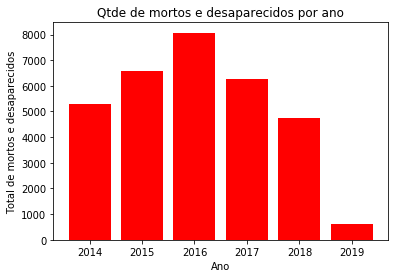

In [8]:
#Análise 1: Qual ano teve mais mortos e desaparecidos?
# A partir do gráfico abaixo, observamos que o ano com maior quantidade de mortos e/ou desaparecidos foi 2016.
x = migrantes.groupby('ANO_INCIDENTE').sum()
x = x.reset_index()

plt.bar(x.ANO_INCIDENTE,x.TOTAL_MIGRANTES_MORTOS_DESAPARECIDOS,color='red')

plt.xlabel("Ano")
plt.ylabel("Total de mortos e desaparecidos")
plt.title("Qtde de mortos e desaparecidos por ano")


Text(0.5, 1.0, 'Mortos por ano')

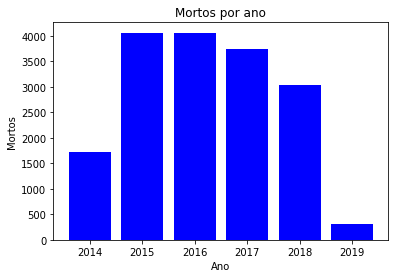

In [22]:
#Análise 2:Qual o ano com mais mortos?
# A partir do gráfico abaixo, observamos que o ano com maior quantidade de mortos foi 2016, com 4059, seguindo de 2015, com 4045.

x = migrantes.groupby('ANO_INCIDENTE').sum()
x = x.reset_index()

plt.bar(x.ANO_INCIDENTE,x.TOTAL_MIGRANTES_MORTOS,color='blue')
plt.xlabel("Ano")
plt.ylabel("Mortos")
plt.title("Mortos por ano")

12099
31552


Text(0.5, 1.0, 'Mortos por ano')

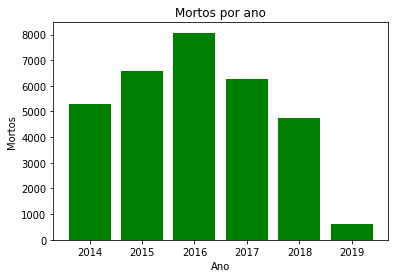

In [15]:
#Análise 3: Qaul o ano com mais desaparecidos?
# A partir do gráfico abaixo, observamos que o ano com maior quantidade de desaparecidos foi e 2016.
x = migrantes.groupby('ANO_INCIDENTE').sum()
x = x.reset_index()
print (sum(x.ANO_INCIDENTE))
print (sum(x.TOTAL_MIGRANTES_MORTOS_DESAPARECIDOS))
plt.bar(x.ANO_INCIDENTE,x.TOTAL_MIGRANTES_MORTOS_DESAPARECIDOS,color='green')

plt.xlabel("Ano")
plt.ylabel("Mortos")
plt.title("Mortos por ano")

Text(0.5, 1.0, 'Mortos e desaparecidos por região')

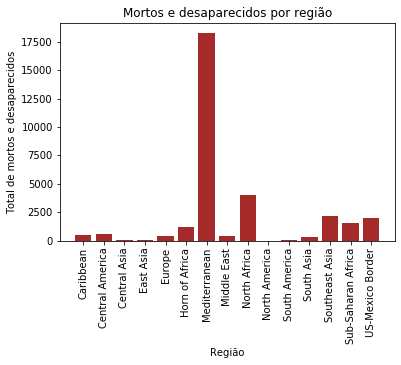

In [18]:
#Análise 4: Qual região teve mais migrantes mortos e desaparecidos?
# A partir do gráfico abaixo, observamos que a região com maior mortos e/ou desaparecidos foi Mediterranean.

x = migrantes.groupby('REGIAO_INCIDENTE').sum()
x = x.reset_index()

plt.xticks(rotation=90)
plt.bar(x.REGIAO_INCIDENTE,x.TOTAL_MIGRANTES_MORTOS_DESAPARECIDOS,color='brown')

plt.xlabel("Região")
plt.ylabel("Total de mortos e desaparecidos")
plt.title("Mortos e desaparecidos por região")


In [ ]:
#teset da analise 5

x = migrantes.groupby('ANO_INCIDENTE').sum()
x = x.reset_index()

print ('mortos:', sum(migrantes.TOTAL_MIGRANTES_MORTOS))
print ('desaparecidos:', sum(migrantes.TOTAL_MIGRANTES_DESAPARECIDOS))
print ('mortos e desaparecidos:', sum(migrantes.TOTAL_MIGRANTES_MORTOS_DESAPARECIDOS))
print ('homens/ulheres/criancas:', sum(x.QTDE_HOMENS)+sum(x.QTDE_MULHERES)+sum(x.QTDE_CRIANCAS))

labels = ['Homens','Mulheres','Criancas']
sizes = [sum(x.QTDE_HOMENS),sum(x.QTDE_MULHERES),sum(x.QTDE_CRIANCAS)]

print (sizes)

fig1, ax1 = plt.subplots()

ax1.pie(sizes, labels = labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

--------------------------------
countries = ['USA', 'GB', 'China', 'Russia', 'Germany']
bronzes = np.array([38, 17, 26, 19, 15])
silvers = np.array([37, 23, 18, 18, 10])
golds = np.array([46, 27, 26, 19, 17])
ind = [x for x, _ in enumerate(countries)]

plt.bar(ind, golds, width=0.8, label='golds', color='gold', bottom=silvers+bronzes)
plt.bar(ind, silvers, width=0.8, label='silvers', color='silver', bottom=bronzes)
plt.bar(ind, bronzes, width=0.8, label='bronzes', color='#CD853F')

plt.xticks(ind, countries)
plt.ylabel("Medals")
plt.xlabel("Countries")
plt.legend(loc="upper right")
plt.title("2012 Olympics Top Scorers")

plt.show()


mortos: 16905.0
desaparecidos: 14647.0
mortos e desaparecidos: 31552
homens/ulheres/criancas: 8719.0
[5319.0, 1805.0, 1595.0]


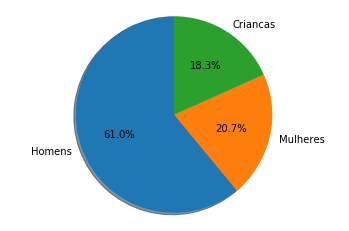

In [86]:
#Análise 5: Houve mais mortes de homens, mulheres ou crianças? 
# A partir do gráfico abaixo, observamos que morreram mais crianças, seguindo dos homens e depois as mulheres.

x = migrantes.groupby('ANO_INCIDENTE').sum()
x = x.reset_index()

print ('mortos:', sum(migrantes.TOTAL_MIGRANTES_MORTOS))
print ('desaparecidos:', sum(migrantes.TOTAL_MIGRANTES_DESAPARECIDOS))
print ('mortos e desaparecidos:', sum(migrantes.TOTAL_MIGRANTES_MORTOS_DESAPARECIDOS))
print ('homens/ulheres/criancas:', sum(x.QTDE_HOMENS)+sum(x.QTDE_MULHERES)+sum(x.QTDE_CRIANCAS))

labels = ['Homens','Mulheres','Criancas']
sizes = [sum(x.QTDE_HOMENS),sum(x.QTDE_MULHERES),sum(x.QTDE_CRIANCAS)]

print (sizes)

fig1, ax1 = plt.subplots()

ax1.pie(sizes, labels = labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.show()



Text(0.5, 1.0, 'Qtde de mortos e desaparecidos por ano')

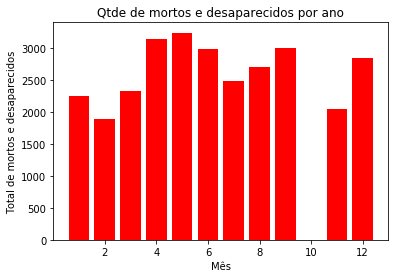

In [13]:
#Análise 6: Qual mês que teve mais mortos ou desaparecidos?
# A partir do gráfico abaixo, observamos que o mês com maior quantidade de mortos e/ou desaparecidos foi maaio (5).
x = migrantes.groupby('MES_INCIDENTE').sum()
x = x.reset_index()

plt.bar(x.MES_INCIDENTE,x.TOTAL_MIGRANTES_MORTOS_DESAPARECIDOS,color='red')

plt.xlabel("Mês")
plt.ylabel("Total de mortos e desaparecidos")
plt.title("Qtde de mortos e desaparecidos por ano")

14647.0
31552


Text(0.5, 1.0, 'Mortos x desaparecidos')

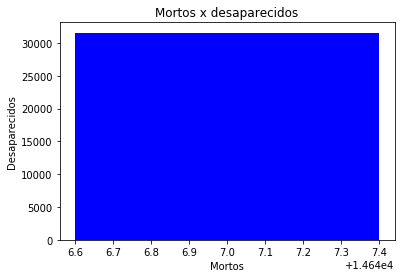

In [26]:
# Analise 7: houve mais mortos ou desaparecidos?
# De acordo com o grafico, houve mais mortos 

??????????????só fazer se tiver terminado o restante ????????????????

y = sum(migrantes.TOTAL_MIGRANTES_MORTOS_DESAPARECIDOS)
x = sum(migrantes.TOTAL_MIGRANTES_DESAPARECIDOS)
print(x)
print (y)
#plt.bar(sum(migrantes.TOTAL_MIGRANTES_DESAPARECIDOS),sum(migrantes.TOTAL_MIGRANTES_MORTOS_DESAPARECIDOS),color='red')
#plt.bar(sum(migrantes.TOTAL_MIGRANTES_MORTOS),sum(migrantes.TOTAL_MIGRANTES_MORTOS_DESAPARECIDOS),color='green')
#pd.Series(sum(migrantes.TOTAL_MIGRANTES_MORTOS),sum(migrantes.TOTAL_MIGRANTES_MORTOS_DESAPARECIDOS),index=pd.date_range('1/1/2000')
#X = sum(migrantes["TOTAL_MIGRANTES_DESAPARECIDOS"])

#X.plot.hist()

plt.bar(x,y,color='blue')
#plt.bar(x2,y2,color='green')


plt.xlabel("Mortos")
plt.ylabel("Desaparecidos")
plt.title("Mortos x desaparecidos")



#### 4.2) **(20%)** Análise 2 - Dependência entre variáveis
O aluno deve apresentar as mesmas distribuições para cada valor da variável dependente. Exemplo: Em um conjunto de dados em que as variáveis independentes são idade e sexo, e a variável dependente é renda. O aluno pode dividir a renda em 3 "grupos", <1000 reais, entre 1000 e 10000 reais e >1000 reais. Para cada um desses grupos, é necessário apresentar a distribuição das variáveis "idade" e "sexo".


In [ ]:
# Implemente sua análise aqui. Use mais blocos se achar que ficará mais organizado.

no seu exemplo, uma possivel analise dessa natureza poderia ser:
total de fatalidades por regiao e mes; ou
total de fatalidades por causa e local

1) total de mortos por mes/ano
2) total de desaparecidos por mes/ano
3) Total de mulheres mortas e desaparecidas por mes/ano
4) Total de homens mortos e desaparecidas por mes/ano
5) Total de criancas mortas e desaparecidas por mes/ano

6) Total de mortos por estacao do ano
# Identificar quais sao os hemisferios de cada regiao
dar um groupby por regiao

# identificar estacao do mes por hesmiferio
migrantes['MES_INCIDENTE'] = migrantes['MES_INCIDENTE'].map({
    'Jan': 1, 
    'Feb': 2,
    'Mar': 3, 
    'Apr': 4,
    'May': 5,
    'Jun': 6,
    'Jul': 7,
    'Aug': 8,
    'Sep': 9,
    'Out': 10,
    'Nov': 11,
    'Dec': 12})
 # criar uma coluna para armazenar o valor acima

7) Total de mortos por período do mes


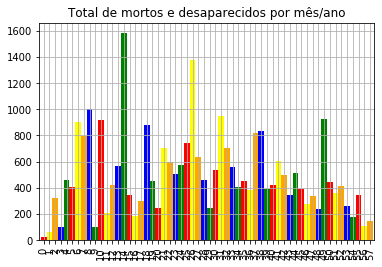

In [49]:
#Análise 1: total de mortos por mes/ano
# De acordo com o gráfico o mês/ano com maior quantidade de mortos e desaparecidos foi ?????

x = migrantes.groupby(['ANO_INCIDENTE','MES_INCIDENTE']).sum()
x = x.reset_index()


x['TOTAL_MIGRANTES_MORTOS_DESAPARECIDOS'].plot(kind='bar',width=1.0, color=['red','yellow','orange','blue','green'], title='Total de mortos e desaparecidos por mês/ano',grid=True)


In [44]:
#Análise 1: total de mortos por mes/ano
# A partir do gráfico abaixo, observamos que o total de mortos por mês/ano foi ??????

x = migrantes.groupby(['ANO_INCIDENTE','MES_INCIDENTE']).sum()
#x = x.reset_index()

#print ([x.ANO_INCIDENTE,'/',x.MES_INCIDENTE])
#print (x)

plt.bar(x.MES_INCIDENTE,sum(x.TOTAL_MIGRANTES_MORTOS_DESAPARECIDOS),color='red')

plt.xlabel("Mês")
plt.ylabel("Total de mortos e desaparecidos")
plt.title("Qtde de mortos e desaparecidos por ano")


AttributeError: 'DataFrame' object has no attribute 'MES_INCIDENTE'

#### 4.3) **(20%)** Análise 3 - Correlação entre variáveis

O aluno deve apresentar 3 análises de correlação entre variáveis do conjunto de dados trabalhado. Exemplo: Em um conjunto de dados com as informações de temperatura e ocorrência de incêndios, eu gostaria de saber a incidência de correlação entre as duas variáveis.



In [ ]:
# Primeiro par de variáveis: Implemente sua análise aqui. Use mais blocos se achar que ficará mais organizado.

In [ ]:
# Segundo par de variáveis: Implemente sua análise aqui. Use mais blocos se achar que ficará mais organizado.

In [ ]:
# Terceiro par de variáveis: Implemente sua análise aqui. Use mais blocos se achar que ficará mais organizado.

### 5) Conclusões **15%**

*O que é possível concluir com os dados que você analisou? Se fosse fazer uma apresentação, o que levaria como os maiores destaques e por que?*

Observado que muitos registros, não contém, informação de quantidade de homens, mulheres e crianças mortos ou desaparecidos, precisando que a base seja melhor mantida.